In [10]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
spy_df=pd.read_csv(Path('./datasets/sp500indexand11sectors/SPX INDEX.csv'))

In [3]:
spy_df

,Date,Open,High,Low,Close
0,2020-03-12,2630.86,2660.95,2478.86,2480.64
1,2020-03-13,2569.99,2711.33,2492.37,2711.02
2,2020-03-16,2508.59,2562.98,2380.94,2386.13
3,2020-03-17,2425.66,2553.93,2367.04,2529.19
4,2020-03-18,2436.50,2453.57,2280.52,2398.10
...,...,...,...,...,...
452,2021-12-27,4733.99,4791.49,4733.99,4791.19
453,2021-12-28,4795.49,4807.02,4780.04,4786.35
454,2021-12-29,4788.64,4804.06,4778.08,4793.06
455,2021-12-30,4794.23,4808.93,4775.33,4778.73


In [4]:
spy_df=spy_df.drop(columns=['Open','High','Low'])

In [5]:
x=np.arange(spy_df['Date'].size).reshape(-1,1)

In [6]:
x.shape

(457, 1)

In [7]:
y=spy_df.Close

In [8]:
model=LinearRegression()

In [9]:
model.fit(x,y)

LinearRegression()

In [10]:
y_pred = model.predict(x)

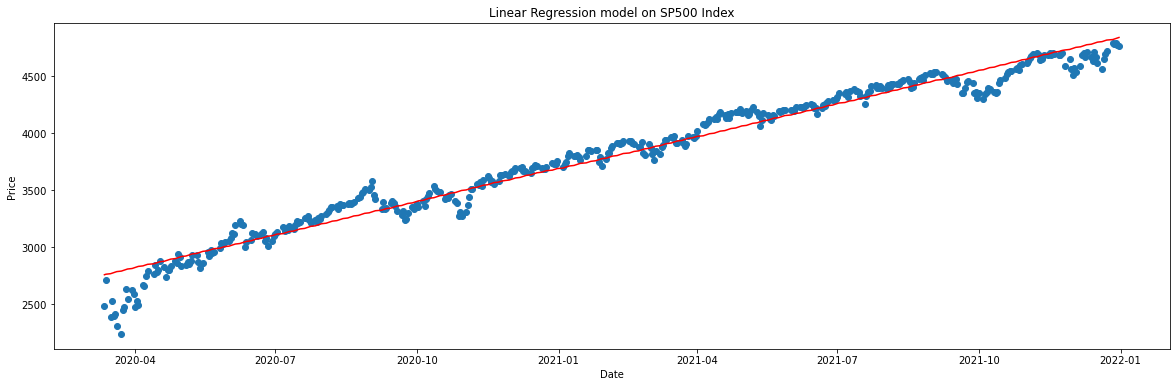

In [11]:
plt.rcParams["figure.figsize"] = (20,6)
spy_df['Date'] = pd.to_datetime(spy_df['Date'])   
plt.scatter(spy_df.Date,y)
plt.xlabel("Date")
plt.ylabel("Price")
plt.plot(spy_df.Date,y_pred,color='red')
plt.title("Linear Regression model on SP500 Index")
plt.show()

In [12]:
spy_df["Pred_Price"]=y_pred

In [13]:
spy_df

,Date,Close,Pred_Price
0,2020-03-12,2480.64,2757.587511
1,2020-03-13,2711.02,2762.156758
2,2020-03-16,2386.13,2766.726004
3,2020-03-17,2529.19,2771.295251
4,2020-03-18,2398.10,2775.864498
...,...,...,...
452,2021-12-27,4791.19,4822.887056
453,2021-12-28,4786.35,4827.456302
454,2021-12-29,4793.06,4832.025549
455,2021-12-30,4778.73,4836.594796


In [14]:
r2_score(y, y_pred)

0.968659686018521

In [15]:
spy_df.describe()

,Close,Pred_Price
count,457.000000,457.000000
mean,3799.375777,3799.375777
std,613.139390,603.454917
min,2237.400000,2757.587511
25%,3335.470000,3278.481644
50%,3841.940000,3799.375777
75%,4357.040000,4320.269910
max,4793.060000,4841.164043


In [76]:
spy_df.to_csv("Prediction data (SPY and Covid companies)/SPY.csv")

In [11]:
covid = pd.read_csv("datasets/Covid_Companies_Stocks.csv")

In [12]:
covid

,Ticker,Date,Open,High,Low,Close,Trading Volume,Volume Weighted Average Price,Number of Transactions
0,PFE,2020-03-11,30.480,32.000,30.00,30.02,60585686.0,30.6586,307447
1,PFE,2020-03-12,31.270,32.880,30.23,32.71,58156515.0,31.4335,313654
2,PFE,2020-03-15,29.940,32.285,29.65,30.18,48333517.0,30.9841,270185
3,PFE,2020-03-16,31.640,32.650,30.59,32.16,52139745.0,31.6114,317412
4,PFE,2020-03-17,30.770,32.610,30.31,32.36,42228311.0,31.6159,249462
...,...,...,...,...,...,...,...,...,...
2737,NVAX,2021-12-26,168.555,169.390,155.11,157.80,8934203.0,160.0433,159765
2738,NVAX,2021-12-27,153.160,175.990,153.10,155.84,12384643.0,162.9178,185409
2739,NVAX,2021-12-28,153.280,155.280,144.56,153.25,7511780.0,150.6786,111874
2740,NVAX,2021-12-29,152.780,159.000,148.86,154.83,5093321.0,154.1007,82034


In [13]:
covid_df=covid.drop(columns=['Open','High','Low','Trading Volume','Volume Weighted Average Price','Number of Transactions'])

In [14]:
covid_df

,Ticker,Date,Close
0,PFE,2020-03-11,30.02
1,PFE,2020-03-12,32.71
2,PFE,2020-03-15,30.18
3,PFE,2020-03-16,32.16
4,PFE,2020-03-17,32.36
...,...,...,...
2737,NVAX,2021-12-26,157.80
2738,NVAX,2021-12-27,155.84
2739,NVAX,2021-12-28,153.25
2740,NVAX,2021-12-29,154.83


In [15]:
PFE_df=covid.loc[covid_df['Ticker']=='PFE']

In [16]:
PFE_df

,Ticker,Date,Open,High,Low,Close,Trading Volume,Volume Weighted Average Price,Number of Transactions
0,PFE,2020-03-11,30.48,32.000,30.000,30.02,60585686.0,30.6586,307447
1,PFE,2020-03-12,31.27,32.880,30.230,32.71,58156515.0,31.4335,313654
2,PFE,2020-03-15,29.94,32.285,29.650,30.18,48333517.0,30.9841,270185
3,PFE,2020-03-16,31.64,32.650,30.590,32.16,52139745.0,31.6114,317412
4,PFE,2020-03-17,30.77,32.610,30.310,32.36,42228311.0,31.6159,249462
...,...,...,...,...,...,...,...,...,...
452,PFE,2021-12-26,58.85,59.380,58.231,59.20,27362581.0,59.0122,203587
453,PFE,2021-12-27,59.05,59.450,57.080,58.01,36901704.0,57.8947,237418
454,PFE,2021-12-28,57.31,58.030,57.070,57.58,26170224.0,57.6581,177306
455,PFE,2021-12-29,57.75,58.740,57.530,58.40,24559004.0,58.2467,151720


In [17]:
x=np.arange(PFE_df['Date'].size).reshape(-1,1)

In [18]:
x.shape

(457, 1)

In [19]:
y=PFE_df.Close

In [20]:
model=LinearRegression()

In [21]:
model.fit(x,y)

LinearRegression()

In [22]:
y_pred = model.predict(x)

/var/folders/mx/ddl26rl54v52bn8d6n665nl00000gn/T/ipykernel_44099/3136643248.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PFE_df['Date'] = pd.to_datetime(PFE_df['Date'])


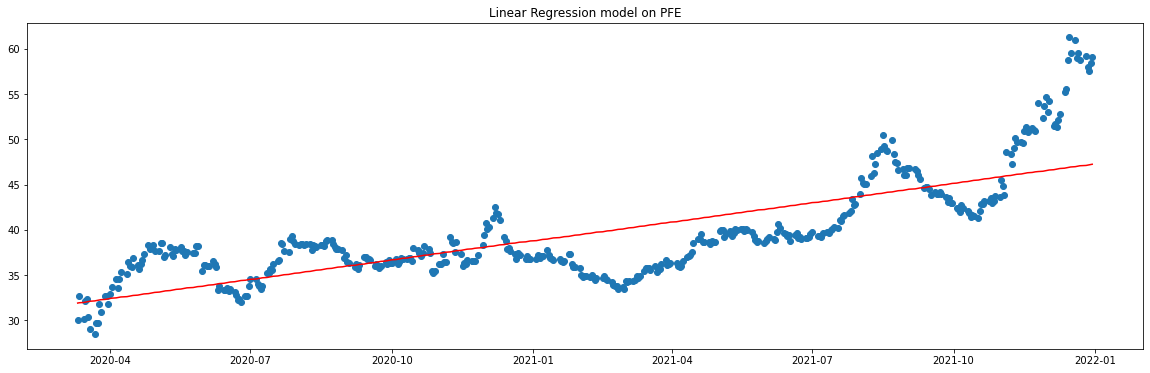

In [23]:
plt.rcParams["figure.figsize"] = (20,6)
PFE_df['Date'] = pd.to_datetime(PFE_df['Date'])   
plt.scatter(PFE_df.Date,y)
plt.plot(PFE_df.Date,y_pred,color='red')
plt.title("Linear Regression model on PFE")
plt.show()

In [24]:
PFE_df["Pred_Price"]=y_pred

/var/folders/mx/ddl26rl54v52bn8d6n665nl00000gn/T/ipykernel_44099/627509719.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PFE_df["Pred_Price"]=y_pred


In [25]:
PFE_df=PFE_df.drop(columns=['Open','High','Low','Trading Volume','Volume Weighted Average Price','Number of Transactions'])

In [26]:
PFE_df

,Ticker,Date,Close,Pred_Price
0,PFE,2020-03-11,30.02,31.906148
1,PFE,2020-03-12,32.71,31.939783
2,PFE,2020-03-15,30.18,31.973418
3,PFE,2020-03-16,32.16,32.007053
4,PFE,2020-03-17,32.36,32.040688
...,...,...,...,...
452,PFE,2021-12-26,59.20,47.109159
453,PFE,2021-12-27,58.01,47.142794
454,PFE,2021-12-28,57.58,47.176429
455,PFE,2021-12-29,58.40,47.210064


In [35]:
see=mean_squared_error(y,y_pred)**(1/2)

In [32]:
r2_score(y, y_pred)

0.5873461231926973

In [33]:
print("where m =", round(model.coef_[0],2), "and b =", round(model.intercept_,2))

where m = 0.03 and b = 31.91


In [36]:
t_test=0.03/see
t_test

0.008066026532217831

In [69]:
PFE_df.to_csv("Prediction data (SPY and Covid companies)/PFE.csv")

In [37]:
NVAX_df=covid.loc[covid_df['Ticker']=='NVAX']

In [38]:
NVAX_df=NVAX_df.drop(columns=['Open','High','Low','Trading Volume','Volume Weighted Average Price','Number of Transactions'])


In [39]:
x=np.arange(NVAX_df['Date'].size).reshape(-1,1)

In [40]:
x.shape

(457, 1)

In [41]:
y=NVAX_df.Close

In [42]:
model=LinearRegression()

In [43]:
model.fit(x,y)

LinearRegression()

In [44]:
y_pred = model.predict(x)

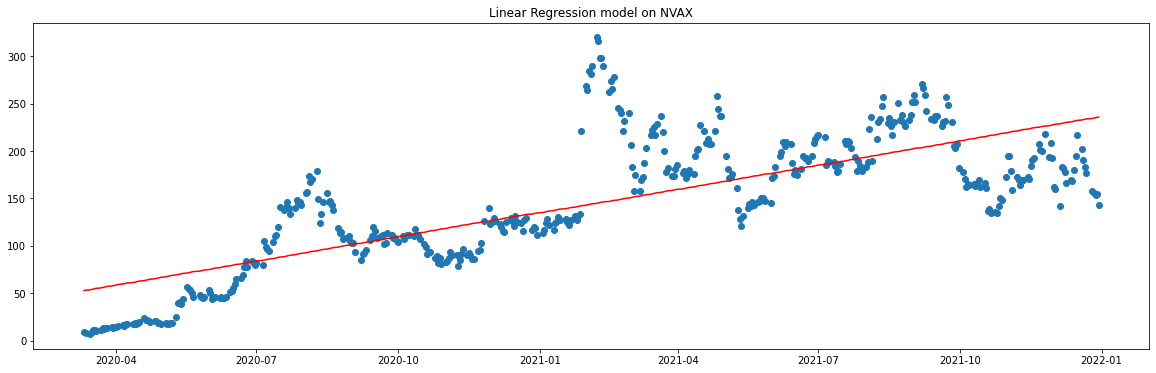

In [45]:
plt.rcParams["figure.figsize"] = (20,6)
NVAX_df['Date'] = pd.to_datetime(NVAX_df['Date'])   
plt.scatter(NVAX_df.Date,y)
plt.plot(NVAX_df.Date,y_pred,color='red')
plt.title("Linear Regression model on NVAX")
plt.show()

In [46]:
NVAX_df["Pred_Price"]=y_pred

In [47]:
NVAX_df

,Ticker,Date,Close,Pred_Price
2285,NVAX,2020-03-11,9.29,52.709790
2286,NVAX,2020-03-12,8.41,53.111686
2287,NVAX,2020-03-15,6.91,53.513581
2288,NVAX,2020-03-16,9.50,53.915477
2289,NVAX,2020-03-17,10.65,54.317372
...,...,...,...,...
2737,NVAX,2021-12-26,157.80,234.366545
2738,NVAX,2021-12-27,155.84,234.768440
2739,NVAX,2021-12-28,153.25,235.170336
2740,NVAX,2021-12-29,154.83,235.572231


In [48]:
r2_score(y, y_pred)

0.5801860876010085

In [49]:
print("where m =", round(model.coef_[0],2), "and b =", round(model.intercept_,2))

where m = 0.4 and b = 52.71


In [50]:
see=mean_squared_error(y,y_pred)**(1/2)

In [51]:
t_test=0.03/see
t_test

0.0006651794810424616

In [70]:
NVAX_df.to_csv("Prediction data (SPY and Covid companies)/NVAX.csv")

In [52]:
MRNA_df=covid.loc[covid_df['Ticker']=='MRNA']
MRNA_df=MRNA_df.drop(columns=['Open','High','Low','Trading Volume','Volume Weighted Average Price','Number of Transactions'])

In [53]:
x=np.arange(MRNA_df['Date'].size).reshape(-1,1)
x.shape

(457, 1)

In [54]:
y=MRNA_df.Close
model=LinearRegression()
model.fit(x,y)

LinearRegression()

In [55]:
y_pred = model.predict(x)

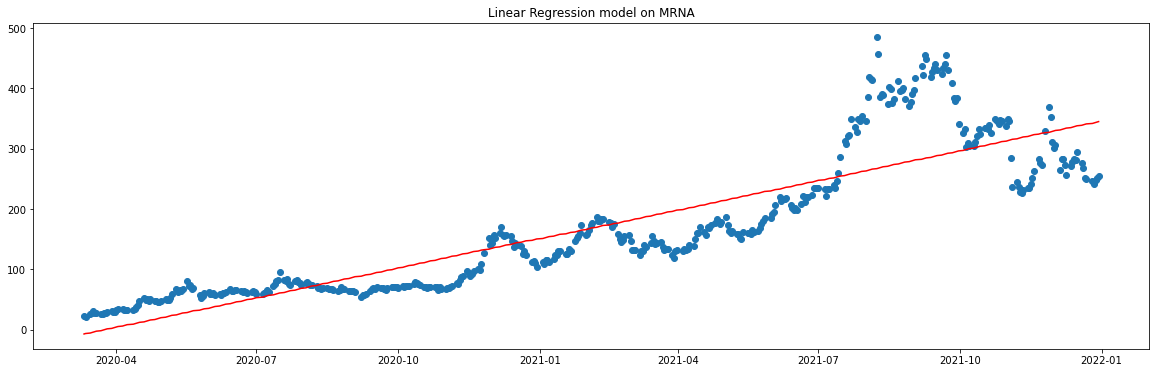

In [56]:
plt.rcParams["figure.figsize"] = (20,6)
MRNA_df['Date'] = pd.to_datetime(MRNA_df['Date'])   
plt.scatter(MRNA_df.Date,y)
plt.plot(MRNA_df.Date,y_pred,color='red')
plt.title("Linear Regression model on MRNA")
plt.show()

In [57]:
MRNA_df["Pred_Price"]=y_pred
MRNA_df

,Ticker,Date,Close,Pred_Price
1371,MRNA,2020-03-11,22.30,-7.197935
1372,MRNA,2020-03-12,21.30,-6.425592
1373,MRNA,2020-03-15,26.49,-5.653249
1374,MRNA,2020-03-16,28.18,-4.880907
1375,MRNA,2020-03-17,31.58,-4.108564
...,...,...,...,...
1823,MRNA,2021-12-26,246.88,341.901036
1824,MRNA,2021-12-27,241.44,342.673379
1825,MRNA,2021-12-28,247.88,343.445722
1826,MRNA,2021-12-29,251.60,344.218065


In [58]:
r2_score(y, y_pred)

0.7699330613888375

In [59]:
print("where m =", round(model.coef_[0],2), "and b =", round(model.intercept_,2))

where m = 0.77 and b = -7.2


In [60]:
see=mean_squared_error(y,y_pred)**(1/2)

In [61]:
t_test=0.03/see
t_test

0.0005386243222078712

In [66]:
MRNA_df.to_csv("Prediction data (SPY and Covid companies)/MRNA.csv")

In [62]:
JNJ_df=covid.loc[covid_df['Ticker']=='JNJ']
JNJ_df=JNJ_df.drop(columns=['Open','High','Low','Trading Volume','Volume Weighted Average Price','Number of Transactions'])
x=np.arange(JNJ_df['Date'].size).reshape(-1,1)
x.shape

(457, 1)

In [63]:
y=JNJ_df.Close
model=LinearRegression()
model.fit(x,y)
y_pred = model.predict(x)

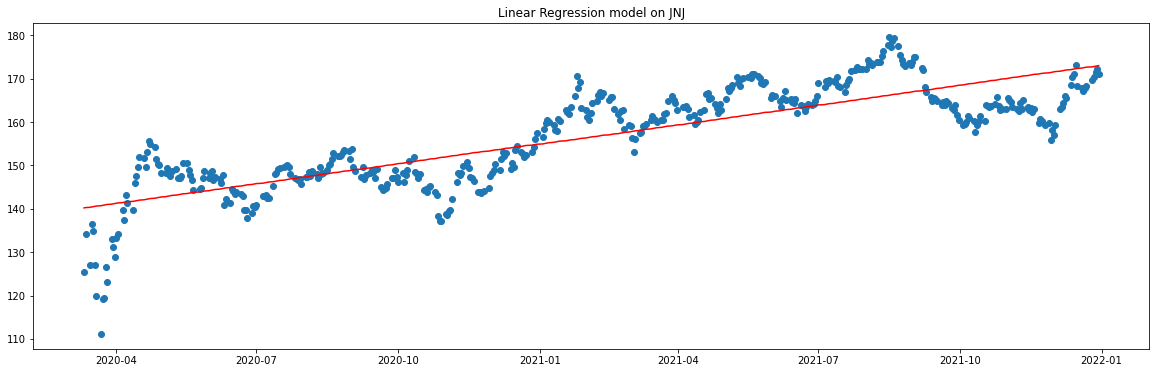

In [64]:
plt.rcParams["figure.figsize"] = (20,6)
JNJ_df['Date'] = pd.to_datetime(JNJ_df['Date'])   
plt.scatter(JNJ_df.Date,y)
plt.plot(MRNA_df.Date,y_pred,color='red')
plt.title("Linear Regression model on JNJ")
plt.show()

In [65]:
JNJ_df["Pred_Price"]=y_pred
JNJ_df

,Ticker,Date,Close,Pred_Price
1828,JNJ,2020-03-11,125.41,140.192700
1829,JNJ,2020-03-12,134.29,140.264612
1830,JNJ,2020-03-15,127.13,140.336524
1831,JNJ,2020-03-16,136.59,140.408435
1832,JNJ,2020-03-17,134.96,140.480347
...,...,...,...,...
2280,JNJ,2021-12-26,169.67,172.696895
2281,JNJ,2021-12-27,170.35,172.768807
2282,JNJ,2021-12-28,171.55,172.840719
2283,JNJ,2021-12-29,172.31,172.912631


In [66]:
r2_score(y, y_pred)

0.6782375616206711

In [67]:
print("where m =", round(model.coef_[0],2), "and b =", round(model.intercept_,2))

where m = 0.07 and b = 140.19


In [68]:
see=mean_squared_error(y,y_pred)**(1/2)

In [69]:
t_test=0.03/see
t_test

0.004591123484684124

In [72]:
JNJ_df.to_csv("Prediction data (SPY and Covid companies)/JNJ.csv")

In [70]:
BNTX_df=covid.loc[covid_df['Ticker']=='BNTX']
BNTX_df=BNTX_df.drop(columns=['Open','High','Low','Trading Volume','Volume Weighted Average Price','Number of Transactions'])
x=np.arange(BNTX_df['Date'].size).reshape(-1,1)
x.shape

(457, 1)

In [71]:
y=BNTX_df.Close
model=LinearRegression()
model.fit(x,y)
y_pred = model.predict(x)

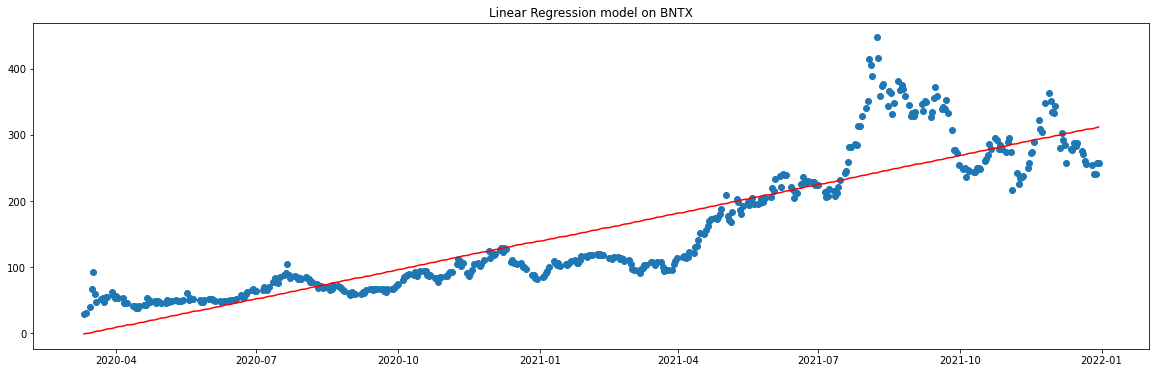

In [72]:
plt.rcParams["figure.figsize"] = (20,6)
BNTX_df['Date'] = pd.to_datetime(BNTX_df['Date'])   
plt.scatter(BNTX_df.Date,y)
plt.plot(BNTX_df.Date,y_pred,color='red')
plt.title("Linear Regression model on BNTX")
plt.show()

In [73]:
BNTX_df["Pred_Price"]=y_pred
BNTX_df

,Ticker,Date,Close,Pred_Price
914,BNTX,2020-03-11,28.55,-1.180158
915,BNTX,2020-03-12,30.93,-0.493619
916,BNTX,2020-03-15,40.00,0.192920
917,BNTX,2020-03-16,66.60,0.879458
918,BNTX,2020-03-17,92.00,1.565997
...,...,...,...,...
1366,BNTX,2021-12-26,254.84,309.135360
1367,BNTX,2021-12-27,241.40,309.821898
1368,BNTX,2021-12-28,240.61,310.508437
1369,BNTX,2021-12-29,256.81,311.194976


In [74]:
r2_score(y, y_pred)

0.7946278496901718

In [75]:
print("where m =", round(model.coef_[0],2), "and b =", round(model.intercept_,2))

where m = 0.69 and b = -1.18


In [76]:
see=mean_squared_error(y,y_pred)**(1/2)

In [77]:
t_test=0.03/see
t_test

0.0006515425371281319

In [73]:
BNTX_df.to_csv("Prediction data (SPY and Covid companies)/BNTX.csv")

In [78]:
AZN_df=covid.loc[covid_df['Ticker']=='AZN']
AZN_df=AZN_df.drop(columns=['Open','High','Low','Trading Volume','Volume Weighted Average Price','Number of Transactions'])
x=np.arange(AZN_df['Date'].size).reshape(-1,1)
x.shape

(457, 1)

In [79]:
y=AZN_df.Close
model=LinearRegression()
model.fit(x,y)
y_pred = model.predict(x)

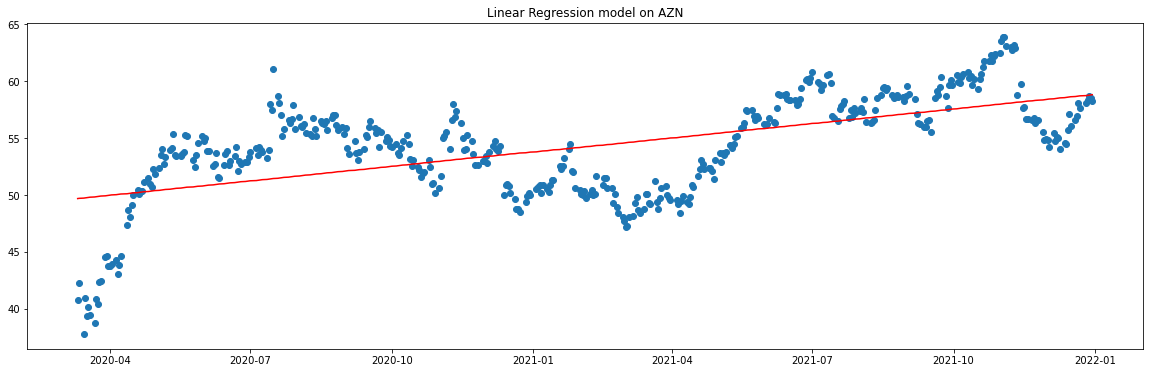

In [80]:
plt.rcParams["figure.figsize"] = (20,6)
AZN_df['Date'] = pd.to_datetime(AZN_df['Date'])   
plt.scatter(AZN_df.Date,y)
plt.plot(AZN_df.Date,y_pred,color='red')
plt.title("Linear Regression model on AZN")
plt.show()

In [81]:
AZN_df["Pred_Price"]=y_pred
AZN_df

,Ticker,Date,Close,Pred_Price
457,AZN,2020-03-11,40.76,49.682219
458,AZN,2020-03-12,42.28,49.702222
459,AZN,2020-03-15,37.79,49.722224
460,AZN,2020-03-16,40.93,49.742226
461,AZN,2020-03-17,39.36,49.762228
...,...,...,...,...
909,AZN,2021-12-26,58.06,58.723242
910,AZN,2021-12-27,58.32,58.743244
911,AZN,2021-12-28,58.65,58.763247
912,AZN,2021-12-29,58.47,58.783249


In [82]:
r2_score(y, y_pred)

0.35192099622252915

In [83]:
print("where m =", round(model.coef_[0],2), "and b =", round(model.intercept_,2))

where m = 0.02 and b = 49.68


In [84]:
see=mean_squared_error(y,y_pred)**(1/2)

In [85]:
t_test=0.03/see
t_test

0.008377726822187905

In [74]:
AZN_df.to_csv("Prediction data (SPY and Covid companies)/AZN.csv")